In [3]:
%matplotlib inline
from numpy import arange, linspace, array
from scipy.stats import binom
from pandas import Series
from matplotlib.pyplot import figure, savefig, ylim, xlim, legend, gca, plot, bar
from matplotlib import rc
from seaborn import barplot
rc('text', usetex=True)
rc('font', family='serif', serif='Times', size=20)

In [30]:
def f(n=20, p=0.5, tail='upper', error='I'):
    
    def standard(x, n=n, p=p):
        return (x - n*p) / ( n*p*(1-p) )**(1/2)
    
    
    x = [ standard(i) for i in range(n+1) ]
    y = Series( binom.pmf( range(n+1),n,p), index=x )
    
    k1 =  standard(7.5, n=20)
    k2 =  standard(12.5, n=20) 
    
    kk1 = k1 * ( n*p*(1-p) )**(1/2) + n*p
    kk2 = k2 * ( n*p*(1-p) )**(1/2) + n*p
    
    figure( figsize=(12,5) )
    ylim(0, 0.20)
    xlim(-5, 5)
    palette = ['gray']*(n+1)
    q = y
    
    if ( tail=='upper' or tail=='two'):
        plot([k2]*2, [0,1], linestyle='--', color='black')
        gca().annotate( 'Rifiuto', 
                    xy=(0.75, 0.93),  
                    color='red', 
                    xycoords='axes fraction' )
        
    if ( tail=='lower' or tail=='two' ):
        plot([k1]*2, [0,1], linestyle='--', color='black') 
        gca().annotate( 'Rifiuto', 
                        xy=(0.25, 0.93),  
                        color='red', 
                        horizontalalignment='right', 
                        xycoords='axes fraction' )
    
    palette = ['gray'] * len(y)
    palette = ['red' if (tail=='lower' and  i <= kk1 )            else palette[i] for i in range(len(y))]
    palette = ['red' if (tail=='upper' and  i >= kk2  )           else palette[i] for i in range(len(y))]
    palette = ['red' if (tail=='two'   and (i <=kk1 or i >= kk2)) else palette[i] for i in range(len(y))]
    if (error=='II'):
        palette = ['blue' if (palette[i]== 'gray') else 'gray' for i in range(len(y))]
      
    #q = [0 if (palette[i]=='gray') else y[i] for i in range(len(y))]  
    q = [0 if (palette[i]=='gray') else y.iloc[i] for i in range(len(y))]  
               
    if (error=='I'):
        gca().annotate(r'$\alpha= P(T_+|H_0)\ \simeq\ ${:.3f}'.format(sum(q)), 
                       xy=(0.98,0.25), 
                       color='red', 
                       horizontalalignment='right', 
                       xycoords='axes fraction')
    #q = [0 if (palette[i]=='gray') else y[standard(i)] for i in range(len(y))] 
    gca().annotate( '$n={}$\n $p={}$'.format(n,p), 
                    xy=(0.02, 0.72), 
                    linespacing=1.8, 
                    xycoords='axes fraction' )
    gca().annotate( 'Non Rifiuto', 
                    xy=(0.5, 0.93), 
                    horizontalalignment='center', 
                    xycoords='axes fraction' )
    return y, palette, sum(q)

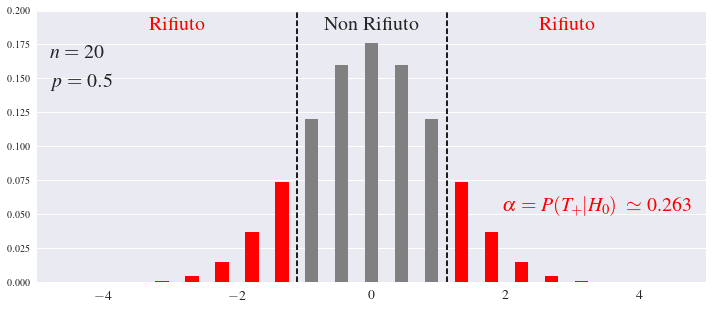

In [31]:
n=20; p=0.5
y, palette, q = f(n=n, p=p, tail='two', error='I')
#y.plot.bar(rot=0, color=palette, grid="off")
#barplot(x=y.index, y=y, palette=palette)
#x = [ '{:.1f}'.format(y.index[i]) if i%2==0 else '' for i in range(n+1) ]
#gca().set_xticklabels(x)
bar(y.index, array(y, dtype=Series), width=0.2, color=palette)
gca().tick_params(axis='x', labelsize=14)
gca().grid(axis='x')
savefig( 'B-test-standard2_01.pdf',bbox_inches='tight' )

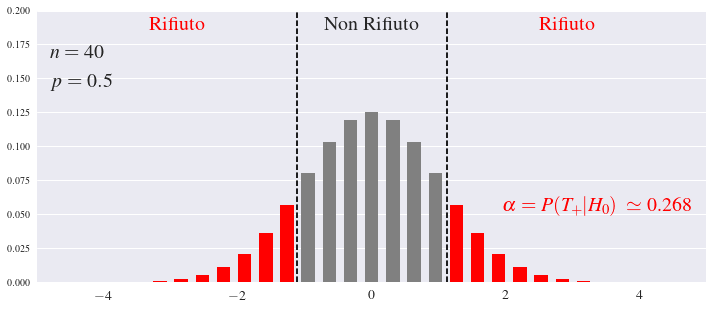

In [37]:
n=40; p=0.5
y, palette, q = f(n=n, p=p,  tail='two', error='I')
ylim(0, 0.20)

#y.plot.bar(rot=0, color=palette, grid="off")
#barplot(x=y.index, y=y, palette=palette)
#x = ['{}'.format(y.index[i]) if i%2==0 else '' for i in range(n+1) ]
#gca().set_xticklabels(x)
bar(y.index, array(y, dtype=Series), width=0.20, color=palette)
gca().tick_params(axis='x', labelsize=14)
gca().grid(axis='x')

savefig('B-test-standard2_02.pdf',bbox_inches='tight')

In [38]:
n=40; p=0.5; k=26
(k - n*p) / ( n*p*(1-p) )**(1/2)

1.8973665961010275

In [39]:
n=20; p=0.5; k=13
(k - n*p) / ( n*p*(1-p) )**(1/2)

1.3416407864998738